In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset from Hugging Face
# IlPost news articles

splits = {'train': 'train.csv', 'validation': 'val.csv', 'test': 'test.csv'}
df = pd.read_csv("hf://datasets/ARTeLab/ilpost/" + splits["train"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
# Print first rows of the dataset
print(df.head())

                                              source  \
0  Lo scorso 27 gennaio Tether, la 18esima cripto...   
1  Nonciclopedia è un sito Internet fondato nel 2...   
2  Il nono e ultimo film della saga di Star Wars,...   
3  Volvo ha stretto un accordo con Uber per forni...   
4  Nella penultima giornata della Mostra del Cine...   

                                              target  
0  C’è molta preoccupazione intorno a una criptov...  
1  Vasco Rossi denuncia Nonciclopedia. E il sito ...  
2  Si parla male del nuovo Star Wars. "L'Ascesa d...  
3  Volvo fornirà a Uber 24mila automobili che si ...  
4  Le foto di giovedì a Venezia. Con Elio Germano...  


In [4]:
df['id'] = df.index

In [5]:
print(df.head())

                                              source  \
0  Lo scorso 27 gennaio Tether, la 18esima cripto...   
1  Nonciclopedia è un sito Internet fondato nel 2...   
2  Il nono e ultimo film della saga di Star Wars,...   
3  Volvo ha stretto un accordo con Uber per forni...   
4  Nella penultima giornata della Mostra del Cine...   

                                              target  id  
0  C’è molta preoccupazione intorno a una criptov...   0  
1  Vasco Rossi denuncia Nonciclopedia. E il sito ...   1  
2  Si parla male del nuovo Star Wars. "L'Ascesa d...   2  
3  Volvo fornirà a Uber 24mila automobili che si ...   3  
4  Le foto di giovedì a Venezia. Con Elio Germano...   4  


In [6]:
# Rename columns
df.rename(columns={"source": "text", "target": "gold"}, inplace=True)

In [7]:
df = df[['id', 'text', 'gold']]

In [8]:
print(df.head())

   id                                               text  \
0   0  Lo scorso 27 gennaio Tether, la 18esima cripto...   
1   1  Nonciclopedia è un sito Internet fondato nel 2...   
2   2  Il nono e ultimo film della saga di Star Wars,...   
3   3  Volvo ha stretto un accordo con Uber per forni...   
4   4  Nella penultima giornata della Mostra del Cine...   

                                                gold  
0  C’è molta preoccupazione intorno a una criptov...  
1  Vasco Rossi denuncia Nonciclopedia. E il sito ...  
2  Si parla male del nuovo Star Wars. "L'Ascesa d...  
3  Volvo fornirà a Uber 24mila automobili che si ...  
4  Le foto di giovedì a Venezia. Con Elio Germano...  


In [9]:
# Arrivati a questo punto abbiamo un dataset concorde con quello generato dallo script di preprocessing del repo originale

In [10]:
# Importiamo il repository con il modello e prepariamo tutto per eseguire

In [11]:
!git clone https://github.com/Marlowess/glimpse-mds-nlp-prj

fatal: destination path 'glimpse-mds-nlp-prj' already exists and is not an empty directory.


In [12]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [13]:
!pip install -r '/content/glimpse-mds-nlp-prj/requirements'

In [14]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
# Start analysis
%cd /content/glimpse-mds-nlp-prj

/content/glimpse-mds-nlp-prj


In [20]:
import os

data_glimpse = "data/processed/"
if not os.path.exists(data_glimpse):
    os.makedirs(data_glimpse)

df_2 = df[:100]
df_2.to_csv(f"{data_glimpse}all_reviews_2025.csv", encoding='utf-8-sig', index=False)

In [21]:
!bash ./scripts/extractive.sh ./data/processed/all_reviews_2025.csv

./scripts/extractive.sh: line 12: module: command not found
./scripts/extractive.sh: line 13: module: command not found
./scripts/extractive.sh: line 14: conda: command not found
100% 100/100 [00:00<00:00, 2371.36it/s]
Map: 100% 100/100 [00:00<00:00, 12053.98 examples/s]
2025-01-03 15:24:00.902143: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 15:24:00.919727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-03 15:24:00.940449: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-03 15

In [22]:
!bash ./scripts/abstractive.sh ./data/processed/all_reviews_2025.csv --add-padding

./scripts/abstractive.sh: line 12: module: command not found
./scripts/abstractive.sh: line 13: module: command not found
./scripts/abstractive.sh: line 14: conda: command not found
config.json: 100% 1.58k/1.58k [00:00<00:00, 10.5MB/s]
2025-01-03 15:26:24.300022: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 15:26:24.317672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-03 15:26:24.338574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-03 15:26:24.344907: E external/local_xla/

In [23]:
# Computing the RSA score for the processed data
!python glimpse/src/compute_rsa.py --summaries "/content/glimpse-mds-nlp-prj/data/candidates/extractive_sentences-_-all_reviews_2025-_-none-_-2025-01-03-15-23-55.csv" | tail -n 1

2025-01-03 15:49:40.499668: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 15:49:40.517523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-03 15:49:40.538493: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-03 15:49:40.544855: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-03 15:49:40.560207: I tensorflow/core/platform/cpu_feature_guar

In [24]:
!python glimpse/src/compute_rsa.py --summaries "/content/glimpse-mds-nlp-prj/data/candidates/facebook_bart-large-cnn-_-all_reviews_2025-_-top_p_sampling-_-padded-_-2025-01-03-15-28-52.csv" | tail -n 1

2025-01-03 15:51:53.469290: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 15:51:53.487027: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-03 15:51:53.508172: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-03 15:51:53.514577: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-03 15:51:53.529973: I tensorflow/core/platform/cpu_feature_guar

In [25]:
# Scores evalutation
import pickle

abstractive_data_path = '/content/glimpse-mds-nlp-prj/output/facebook_bart-large-cnn-_-all_reviews_2025-_-top_p_sampling-_-padded-_-2025-01-03-15-28-52-_-r3-_-rsa_reranked-google-pegasus-arxiv.pk'

extractive_data_path = '/content/glimpse-mds-nlp-prj/output/extractive_sentences-_-all_reviews_2025-_-none-_-2025-01-03-15-23-55-_-r3-_-rsa_reranked-google-pegasus-arxiv.pk'

with open(abstractive_data_path, 'rb') as f:
    abstractive_data = pickle.load(f)

with open(extractive_data_path, 'rb') as f:
    extractive_data = pickle.load(f)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def analyze_results(data, model_type):
    # Collect metrics
    metrics = {
        'best_rsa_scores': [],
        'best_base_scores': [],
        'consensuality_scores': [],
        'speaker_listener_correlation': []
    }

    for result in data['results']:
        # Convert to string if it's a numpy array with one element
        best_rsa = result['best_rsa']
        best_rsa = best_rsa[0] if isinstance(best_rsa, np.ndarray) else best_rsa

        best_base = result['best_base']
        best_base = best_base[0] if isinstance(best_base, np.ndarray) else best_base

        # Get the best RSA and base scores
        metrics['best_rsa_scores'].append(best_rsa)
        metrics['best_base_scores'].append(best_base)

        # Get mean consensuality score
        metrics['consensuality_scores'].append(np.mean(result['consensuality_scores']))

        # Calculate correlation between speaker and listener scores
        try:
            speaker_scores = result['speaker_df'].values.flatten()
            listener_scores = result['listener_df'].values.flatten()
            correlation = np.corrcoef(speaker_scores, listener_scores)[0, 1]
            metrics['speaker_listener_correlation'].append(correlation)
        except:
            metrics['speaker_listener_correlation'].append(np.nan)

    # Convert to DataFrame
    df = pd.DataFrame(metrics)
    df['model_type'] = model_type

    return df

# Let's first inspect a single result to see its structure
print("Sample of first result from abstractive data:")
first_abstractive = abstractive_data['results'][0]
for key, value in first_abstractive.items():
    print(f"\n{key}:")
    print(f"Type: {type(value)}")
    if hasattr(value, 'shape'):
        print(f"Shape: {value.shape}")
    print("Sample:", str(value)[:100])

print("\nSample of first result from extractive data:")
first_extractive = extractive_data['results'][0]
for key, value in first_extractive.items():
    print(f"\n{key}:")
    print(f"Type: {type(value)}")
    if hasattr(value, 'shape'):
        print(f"Shape: {value.shape}")
    print("Sample:", str(value)[:100])

Sample of first result from abstractive data:

id:
Type: <class 'tuple'>
Sample: (0,)

best_rsa:
Type: <class 'numpy.ndarray'>
Shape: (1,)
Sample: ['Tether, lo più importante criptovaluta per volume di mercato, have interrotto i rapporti with Frie

best_base:
Type: <class 'numpy.ndarray'>
Shape: (1,)
Sample: ['Tether, lo più importante criptovaluta per volume di mercato, have interrotto i rapporti with Frie

speaker_df:
Type: <class 'pandas.core.frame.DataFrame'>
Shape: (1, 8)
Sample:                                                     Tether, lo più importante criptovaluta per volum

listener_df:
Type: <class 'pandas.core.frame.DataFrame'>
Shape: (1, 8)
Sample:                                                     Tether, lo più importante criptovaluta per volum

initial_listener:
Type: <class 'pandas.core.frame.DataFrame'>
Shape: (1, 8)
Sample:                                                     Tether, lo più importante criptovaluta per volum

language_model_proba_df:
Type: <class 'pa

Basic Statistics:

Number of samples:
model_type
abstractive    100
extractive     100
dtype: int64

Average number of candidates:
model_type
abstractive    7.76
extractive     5.74
Name: num_candidates, dtype: float64

Mean scores:
             mean_consensuality  mean_speaker_score  mean_listener_score
model_type                                                              
abstractive                 0.0           -2.023990                  0.0
extractive                  0.0           -1.659261                  0.0


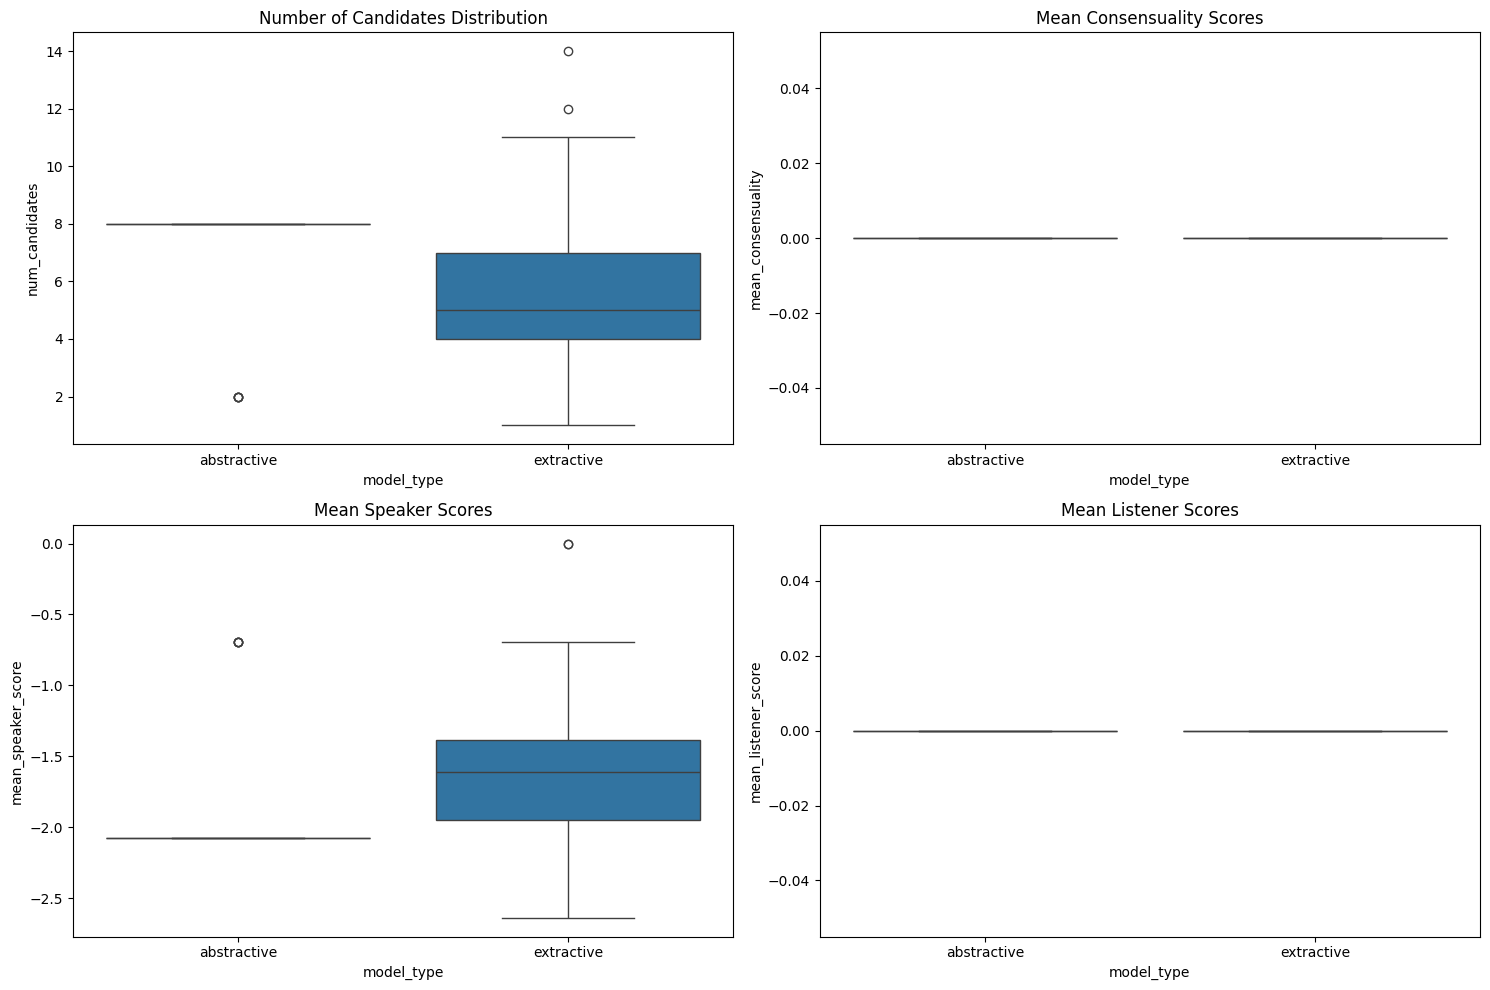


Sample Summaries (First 2 examples):

Example 1:
Gold: C’è molta preoccupazione intorno a una criptovaluta. Tether e il sito affiliato Bitfinex sono accusa...
Best RSA: Tether, lo più importante criptovaluta per volume di mercato, have interrotto i rapporti with Friedm...
Best Base: Tether, lo più importante criptovaluta per volume di mercato, have interrotto i rapporti with Friedm...

Example 2:
Gold: Vasco Rossi denuncia Nonciclopedia. E il sito satirico decide quindi di chiudere bottega....
Best RSA: The Wikipedia-like site Nonciclopedia è chiuse a causa of a denuncia. The post was scrubbed. Aquesto...
Best Base: The Wikipedia-like site Nonciclopedia è chiuse a causa of a denuncia. The post was scrubbed. Aquesto...


In [27]:
def create_summary_analysis(data, model_type):
    all_results = []

    for result in data['results']:
        summary_data = {
            'id': result['id'][0],  # Get the first element of the tuple
            'gold': result['gold'],
            'model_type': model_type,
            'best_rsa_summary': ' '.join(result['best_rsa']),  # Join the array elements
            'best_base_summary': ' '.join(result['best_base']),  # Join the array elements
            'num_candidates': len(result['consensuality_scores']),
            'mean_consensuality': np.mean(result['consensuality_scores']),
            'mean_speaker_score': result['speaker_df'].mean().mean(),
            'mean_listener_score': result['listener_df'].mean().mean(),
        }
        all_results.append(summary_data)

    return pd.DataFrame(all_results)

# Create analysis DataFrames
abstractive_analysis = create_summary_analysis(abstractive_data, 'abstractive')
extractive_analysis = create_summary_analysis(extractive_data, 'extractive')

# Combine the analyses
combined_analysis = pd.concat([abstractive_analysis, extractive_analysis])

# Print basic statistics
print("Basic Statistics:")
print("\nNumber of samples:")
print(combined_analysis.groupby('model_type').size())

print("\nAverage number of candidates:")
print(combined_analysis.groupby('model_type')['num_candidates'].mean())

print("\nMean scores:")
metrics = ['mean_consensuality', 'mean_speaker_score', 'mean_listener_score']
print(combined_analysis.groupby('model_type')[metrics].mean())

# Create visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Number of candidates distribution
plt.subplot(2, 2, 1)
sns.boxplot(data=combined_analysis, x='model_type', y='num_candidates')
plt.title('Number of Candidates Distribution')

# Plot 2: Consensuality scores
plt.subplot(2, 2, 2)
sns.boxplot(data=combined_analysis, x='model_type', y='mean_consensuality')
plt.title('Mean Consensuality Scores')

# Plot 3: Speaker scores
plt.subplot(2, 2, 3)
sns.boxplot(data=combined_analysis, x='model_type', y='mean_speaker_score')
plt.title('Mean Speaker Scores')

# Plot 4: Listener scores
plt.subplot(2, 2, 4)
sns.boxplot(data=combined_analysis, x='model_type', y='mean_listener_score')
plt.title('Mean Listener Scores')

plt.tight_layout()
plt.show()

# Let's also look at a sample of summaries
print("\nSample Summaries (First 2 examples):")
for i in range(2):
    print(f"\nExample {i+1}:")
    print(f"Gold: {combined_analysis.iloc[i]['gold'][:100]}...")
    print(f"Best RSA: {combined_analysis.iloc[i]['best_rsa_summary'][:100]}...")
    print(f"Best Base: {combined_analysis.iloc[i]['best_base_summary'][:100]}...")

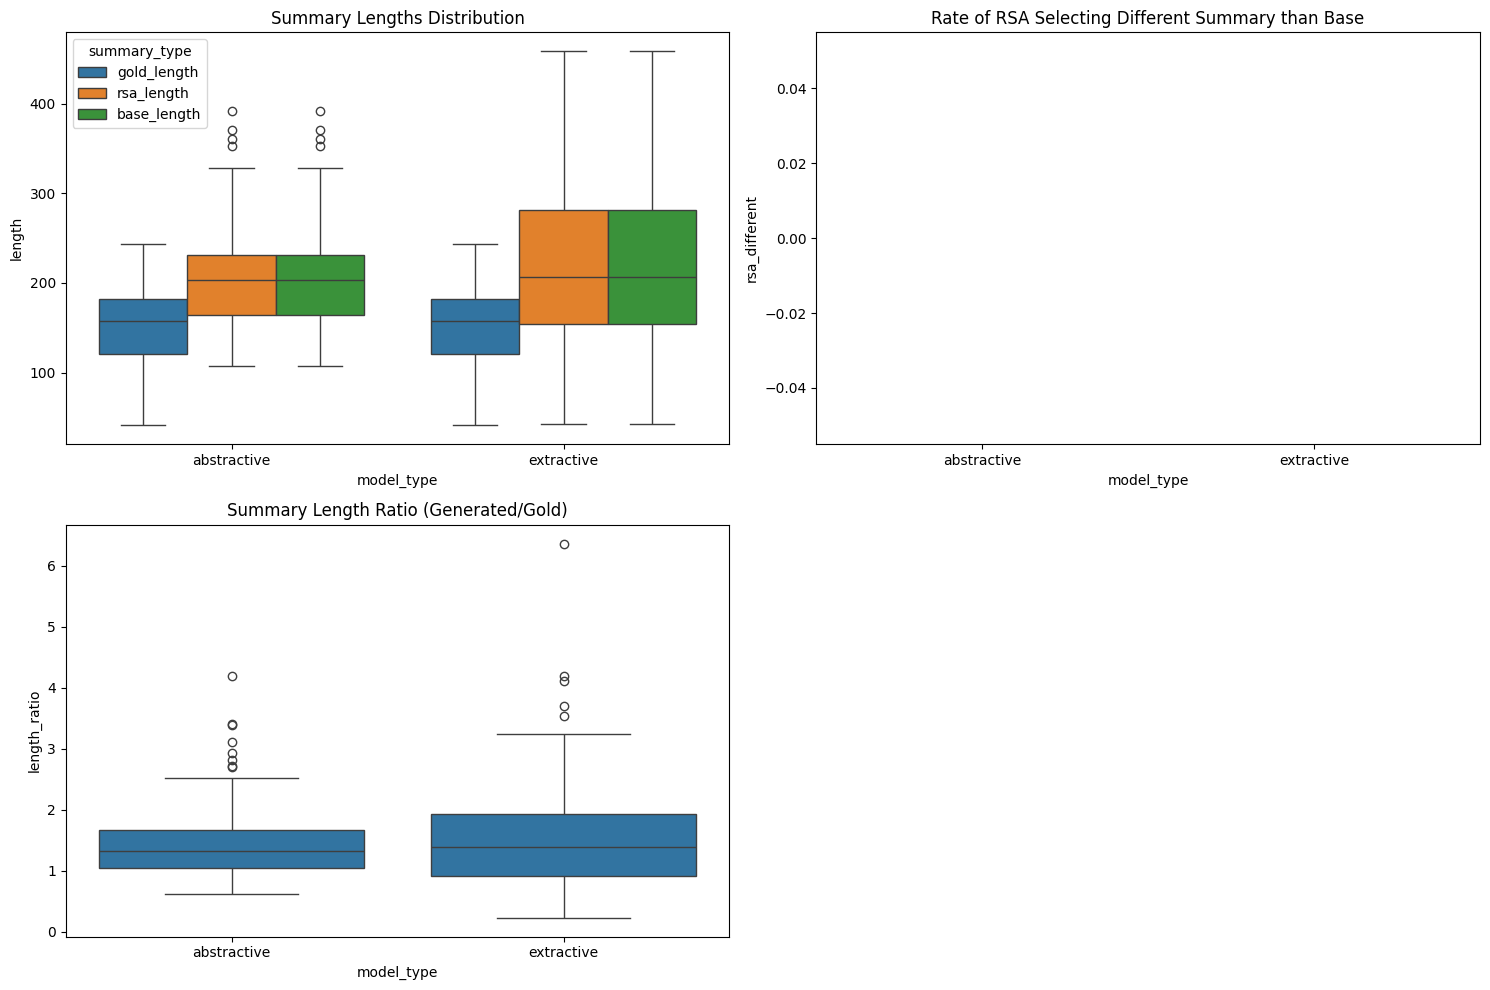


Summary Quality Statistics:

Abstractive Model:
Average gold summary length: 152.61
Average RSA summary length: 207.06
Average base summary length: 207.06
RSA selection difference rate: 0.00%
Length ratio to gold (mean): 1.50

Extractive Model:
Average gold summary length: 152.61
Average RSA summary length: 219.32
Average base summary length: 219.32
RSA selection difference rate: 0.00%
Length ratio to gold (mean): 1.59


In [28]:
def analyze_summary_quality(combined_analysis):
    # Calculate summary lengths
    combined_analysis['gold_length'] = combined_analysis['gold'].str.len()
    combined_analysis['rsa_length'] = combined_analysis['best_rsa_summary'].str.len()
    combined_analysis['base_length'] = combined_analysis['best_base_summary'].str.len()

    # Calculate improvement ratio (how often RSA differs from base)
    combined_analysis['rsa_different'] = (combined_analysis['best_rsa_summary'] != combined_analysis['best_base_summary']).astype(int)

    # Visualization
    plt.figure(figsize=(15, 10))

    # Summary lengths
    plt.subplot(2, 2, 1)
    sns.boxplot(data=combined_analysis.melt(id_vars=['model_type'],
                                          value_vars=['gold_length', 'rsa_length', 'base_length'],
                                          var_name='summary_type', value_name='length'),
                x='model_type', y='length', hue='summary_type')
    plt.title('Summary Lengths Distribution')

    # RSA vs Base difference rate
    plt.subplot(2, 2, 2)
    sns.barplot(data=combined_analysis, x='model_type', y='rsa_different')
    plt.title('Rate of RSA Selecting Different Summary than Base')

    # Length ratio to gold
    plt.subplot(2, 2, 3)
    combined_analysis['length_ratio'] = combined_analysis['rsa_length'] / combined_analysis['gold_length']
    sns.boxplot(data=combined_analysis, x='model_type', y='length_ratio')
    plt.title('Summary Length Ratio (Generated/Gold)')

    plt.tight_layout()
    plt.show()

    # Print statistics
    print("\nSummary Quality Statistics:")
    for model in ['abstractive', 'extractive']:
        subset = combined_analysis[combined_analysis['model_type'] == model]
        print(f"\n{model.capitalize()} Model:")
        print(f"Average gold summary length: {subset['gold_length'].mean():.2f}")
        print(f"Average RSA summary length: {subset['rsa_length'].mean():.2f}")
        print(f"Average base summary length: {subset['base_length'].mean():.2f}")
        print(f"RSA selection difference rate: {subset['rsa_different'].mean()*100:.2f}%")
        print(f"Length ratio to gold (mean): {subset['length_ratio'].mean():.2f}")

analyze_summary_quality(combined_analysis)

In [29]:
# Seahorse evalutation

In [30]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import pandas as pd
from tqdm import tqdm

def evaluate_with_seahorse(summaries_df, question_num, batch_size=4, device="cuda"):
    # Take only first 10 samples
    summaries_df = summaries_df.head(10)

    # Map question numbers to metric names
    question_map = {
        1: "Comprehensible",
        2: "Repetition",
        3: "Grammar",
        4: "Attribution",
        5: "Main ideas",
        6: "Conciseness"
    }

    model_name = f"google/seahorse-large-q{question_num}"
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name, device_map='auto', torch_dtype=torch.float16)
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    template = "premise: {premise} hypothesis: {hypothesis}"

    # Create pairs of texts and print them for inspection
    print(f"\nEvaluating for {question_map[question_num]}:")
    for i, row in summaries_df.iterrows():
        print(f"\nSample {i+1}:")
        print(f"Gold: {row['gold'][:200]}...")
        print(f"Generated: {row['best_rsa_summary'][:200]}...")

    metrics = {
        f"SHMetric/{question_map[question_num]}/proba_1": [],
        f"SHMetric/{question_map[question_num]}/proba_0": [],
        f"SHMetric/{question_map[question_num]}/guess": []
    }

    # Process in batches
    for i in tqdm(range(0, len(summaries_df), batch_size)):
        batch = summaries_df.iloc[i:i+batch_size]
        texts = [template.format(premise=text[:20*1024], hypothesis=summary)
                for text, summary in zip(batch['gold'], batch['best_rsa_summary'])]

        inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
        inputs = {k: v.to(model.device) for k, v in inputs.items()}

        with torch.no_grad():
            N_inputs = inputs["input_ids"].shape[0]
            decoder_input_ids = torch.full(
                (N_inputs, 1),
                tokenizer.pad_token_id,
                dtype=torch.long,
                device=model.device
            )

            outputs = model(**inputs, decoder_input_ids=decoder_input_ids)
            logits = outputs.logits[:, -1, [497, 333]]
            probs = torch.softmax(logits, dim=-1)
            guess = probs.argmax(dim=-1)

            metrics[f"SHMetric/{question_map[question_num]}/proba_1"].extend(probs[:, 1].tolist())
            metrics[f"SHMetric/{question_map[question_num]}/proba_0"].extend(probs[:, 0].tolist())
            metrics[f"SHMetric/{question_map[question_num]}/guess"].extend(guess.tolist())

    # Print probabilities for each sample
    df_metrics = pd.DataFrame(metrics)
    print("\nProbabilities for each sample:")
    print(df_metrics)

    return df_metrics

# Create summary dataframes with first 10 samples
abstractive_summaries = pd.DataFrame({
    'gold': abstractive_analysis['gold'],
    'best_rsa_summary': abstractive_analysis['best_rsa_summary']
})

extractive_summaries = pd.DataFrame({
    'gold': extractive_analysis['gold'],
    'best_rsa_summary': extractive_analysis['best_rsa_summary']
})

# Evaluate both models for key metrics (1: Comprehensible, 2: Repetition)
key_questions = [1, 2]

print("\nEvaluating Abstractive Summaries:")
abstractive_metrics = []
for q in key_questions:
    metrics = evaluate_with_seahorse(abstractive_summaries, q)
    abstractive_metrics.append(metrics)

print("\nEvaluating Extractive Summaries:")
extractive_metrics = []
for q in key_questions:
    metrics = evaluate_with_seahorse(extractive_summaries, q)
    extractive_metrics.append(metrics)

# Print summary comparison
print("\nSummary of Results:")
for i, q in enumerate(key_questions):
    question_map = {1: "Comprehensible", 2: "Repetition"}
    print(f"\n{question_map[q]} Metric:")
    print(f"Abstractive average: {abstractive_metrics[i]['SHMetric/' + question_map[q] + '/proba_1'].mean():.3f}")
    print(f"Extractive average: {extractive_metrics[i]['SHMetric/' + question_map[q] + '/proba_1'].mean():.3f}")


Evaluating Abstractive Summaries:


config.json:   0%|          | 0.00/884 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]


Evaluating for Comprehensible:

Sample 1:
Gold: C’è molta preoccupazione intorno a una criptovaluta. Tether e il sito affiliato Bitfinex sono accusati di creare soldi dal nulla, e si parla di una “bomba a orologeria” che potrebbe far crollare il me...
Generated: Tether, lo più importante criptovaluta per volume di mercato, have interrotto i rapporti with Friedman LLP. Tether es exista principalmente perfacare le transazioni in criptovanute, che sono piÙ facil...

Sample 2:
Gold: Vasco Rossi denuncia Nonciclopedia. E il sito satirico decide quindi di chiudere bottega....
Generated: The Wikipedia-like site Nonciclopedia è chiuse a causa of a denuncia. The post was scrubbed. Aquesto permettono a una scusita di scosio di a livelli....

Sample 3:
Gold: Si parla male del nuovo Star Wars. "L'Ascesa di Skywalker" esce oggi in Italia, e le prime recensioni – SENZA SPOILER – dei giornali americani sono piuttosto negative....
Generated:  nono e ultimo film della saga di Star Wars, L'Ascesa di Sk

  0%|          | 0/3 [00:00<?, ?it/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
100%|██████████| 3/3 [00:01<00:00,  2.12it/s]



Probabilities for each sample:
   SHMetric/Comprehensible/proba_1  SHMetric/Comprehensible/proba_0  \
0                         0.609375                         0.390381   
1                         0.290283                         0.709961   
2                         0.829590                         0.170654   
3                         0.278320                         0.721680   
4                         0.351318                         0.648926   
5                         0.810059                         0.189941   
6                         0.381104                         0.618652   
7                         0.750000                         0.249756   
8                         0.345215                         0.654785   
9                         0.962891                         0.037354   

   SHMetric/Comprehensible/guess  
0                              1  
1                              0  
2                              1  
3                              0  
4          

config.json:   0%|          | 0.00/884 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]


Evaluating for Repetition:

Sample 1:
Gold: C’è molta preoccupazione intorno a una criptovaluta. Tether e il sito affiliato Bitfinex sono accusati di creare soldi dal nulla, e si parla di una “bomba a orologeria” che potrebbe far crollare il me...
Generated: Tether, lo più importante criptovaluta per volume di mercato, have interrotto i rapporti with Friedman LLP. Tether es exista principalmente perfacare le transazioni in criptovanute, che sono piÙ facil...

Sample 2:
Gold: Vasco Rossi denuncia Nonciclopedia. E il sito satirico decide quindi di chiudere bottega....
Generated: The Wikipedia-like site Nonciclopedia è chiuse a causa of a denuncia. The post was scrubbed. Aquesto permettono a una scusita di scosio di a livelli....

Sample 3:
Gold: Si parla male del nuovo Star Wars. "L'Ascesa di Skywalker" esce oggi in Italia, e le prime recensioni – SENZA SPOILER – dei giornali americani sono piuttosto negative....
Generated:  nono e ultimo film della saga di Star Wars, L'Ascesa di Skywal

100%|██████████| 3/3 [00:00<00:00, 11.55it/s]



Probabilities for each sample:
   SHMetric/Repetition/proba_1  SHMetric/Repetition/proba_0  \
0                     0.006500                     0.993652   
1                     0.878906                     0.121216   
2                     0.982422                     0.017593   
3                     0.871582                     0.128418   
4                     0.972168                     0.027878   
5                     0.963867                     0.036102   
6                     0.916992                     0.083069   
7                     0.951660                     0.048340   
8                     0.116760                     0.883301   
9                     0.988770                     0.011330   

   SHMetric/Repetition/guess  
0                          0  
1                          1  
2                          1  
3                          1  
4                          1  
5                          1  
6                          1  
7                         

100%|██████████| 3/3 [00:00<00:00, 10.92it/s]



Probabilities for each sample:
   SHMetric/Comprehensible/proba_1  SHMetric/Comprehensible/proba_0  \
0                         0.984863                         0.015091   
1                         0.930664                         0.069153   
2                         0.980469                         0.019592   
3                         0.923828                         0.076111   
4                         0.976074                         0.023697   
5                         0.982910                         0.016953   
6                         0.979004                         0.020950   
7                         0.942871                         0.057068   
8                         0.976562                         0.023392   
9                         0.967285                         0.032532   

   SHMetric/Comprehensible/guess  
0                              1  
1                              1  
2                              1  
3                              1  
4          

100%|██████████| 3/3 [00:00<00:00, 12.13it/s]



Probabilities for each sample:
   SHMetric/Repetition/proba_1  SHMetric/Repetition/proba_0  \
0                     0.982910                     0.016983   
1                     0.980957                     0.019165   
2                     0.974121                     0.025818   
3                     0.871582                     0.128296   
4                     0.980957                     0.018799   
5                     0.975098                     0.024841   
6                     0.988281                     0.011780   
7                     0.980469                     0.019653   
8                     0.955078                     0.044769   
9                     0.991211                     0.008865   

   SHMetric/Repetition/guess  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  
5                          1  
6                          1  
7                         